In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.image as mpimg

In [2]:
### Goodwin Oscillator
Tmax = 35
dt = 0.01
t = np.linspace(0,Tmax, int(Tmax/dt))

x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

a = 360
k = 1.368
b = 1
alpha = 1
beta = 0.6
gamma = 1
delta = 0.8
n = 12

# a = 360
# k = 1.368
# b = 1
# alpha = 1
# beta = 0.6
# gamma = 1
# delta = 0.8
# n = 12

x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))


for i in range(len(t)-1):
    k1x = a/(k**n + (z[i])**n) - b*x[i]
    k1y = alpha*x[i] -beta*y[i]
    k1z = gamma*y[i] - delta*z[i]
    ax = x[i] + k1x*dt
    ay = y[i] + k1y*dt
    az = z[i] + k1z*dt

    k2x = a/(k**n + (az)**n) - b*ax
    k2y = alpha*ax -beta*ay
    k2z = gamma*ay - delta*az

    x[i+1] = x[i] + (k1x + k2x)*dt/2
    y[i+1] = y[i] + (k1y + k2y)*dt/2
    z[i+1] = z[i] + (k1z + k2z)*dt/2

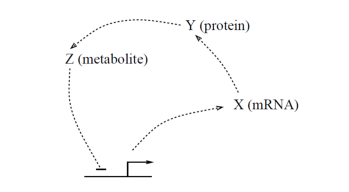

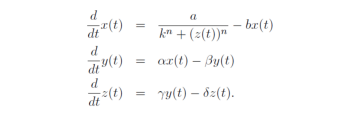

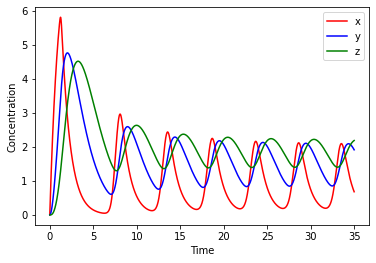

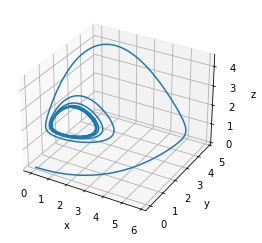

In [3]:
f= plt.figure()
plt.axis("off")
plt.imshow(mpimg.imread("C:\\Users\\leder\\Downloads\\goodwin_schematic.png"))
plt.show()
plt.close()

f = plt.figure()
plt.imshow(mpimg.imread("C:\\Users\\leder\\Downloads\\goodwin_ode.png"))
plt.axis("off")
plt.show()
plt.close()

f = plt.figure()
plt.plot(t, x, "-r")
plt.plot(t, y, "-b")
plt.plot(t, z, "-g")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(["x", "y", "z"])
plt.show()
plt.close()

f = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot3D(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()
plt.close()


In [4]:
### Hasty Relaxation Oscillator

Tmax = 300
dt = 0.1
t = np.linspace(0,Tmax, int(Tmax/dt))

x = np.zeros(len(t))
y = np.zeros(len(t))

# alpha = 11
# sigma = 2
# gammax = 0.9
# gammay = 0.06
# a_y = 0.2

alpha = 11
sigma = 2
gammax = 0.45
gammay = 0.03
a_y = 0.2

x[0] = 0.4
y[0] = 2.3

for i in range(0,len(t)-1):
    k1x = (1 + x[i]**2 + alpha*sigma*x[i]**4)/((1 + x[i]**2 + sigma*x[i]**4)*(1 + y[i]**4)) - gammax*x[i]
    k1y = a_y*(1 + x[i]**2 + alpha*sigma*x[i]**4)/((1+x[i]**2 + sigma*x[i]**4)*(1 + y[i]**4)) - gammay*y[i]
    ax = x[i] + k1x*dt
    ay = y[i] + k1y*dt

    k2x = (1 + ax**2 + alpha*sigma*ax**4)/((1 + ax**2 + sigma*ax**4)*(1 + ay**4)) - gammax*ax
    k2y = a_y*(1 + ax**2 + alpha*sigma*ax**4)/((1+ax**2 + sigma*ax**4)*(1 + ay**4)) - gammay*ay
    
    x[i+1] = x[i] + (k1x + k2x)*dt/2
    y[i+1] = y[i] + (k1y + k2y)*dt/2
 

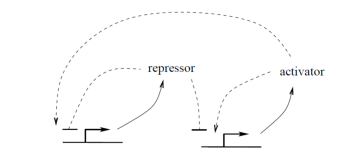

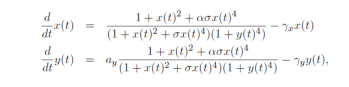

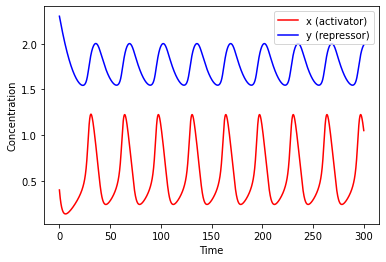

In [5]:
f= plt.figure()
plt.axis("off")
plt.imshow(mpimg.imread("C:\\Users\\leder\\Downloads\\hasty_schematic.png"))
plt.show()
plt.close()

f = plt.figure()
plt.imshow(mpimg.imread("C:\\Users\\leder\\Downloads\\hasty_ode.png"))
plt.axis("off")
plt.show()
plt.close()

f = plt.figure()
plt.plot(t, x, "-r")
plt.plot(t, y, "-b")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(["x (activator)", "y (repressor)"])
plt.show()
plt.close()




In [12]:
### Synchronized Relaxation Oscillator

Tmax = 500
dt = 0.1
t = np.linspace(0,Tmax, int(Tmax/dt))

x1 = np.zeros(len(t))
x2 = np.zeros(len(t))
y1 = np.zeros(len(t))
y2 = np.zeros(len(t))

alpha = 11
sigma = 2
gammax = 0.2
gammay = 0.012
a_y = 0.2
d = 0.015

# alpha = 11
# sigma = 2
# gammax = 0.2
# gammay = 0.012
# a_y = 0.2
# d = 0.04

x1[0] = 0.4
x2[0] = 0.6
y1[0] = 1.9
y2[0] = 2.3

for i in range(0,len(t)-1):
    k1x1 = (1 + x1[i]**2 + alpha*sigma*x1[i]**4)/((1 + x1[i]**2 + sigma*x1[i]**4)*(1 + y1[i]**4)) - gammax*x1[i] + d*(x2[i] - x1[i])
    k1y1 = a_y*(1 + x1[i]**2 + alpha*sigma*x1[i]**4)/((1+x1[i]**2 + sigma*x1[i]**4)*(1 + y1[i]**4)) - gammay*y1[i]
    k1x2 = (1 + x2[i]**2 + alpha*sigma*x2[i]**4)/((1 + x2[i]**2 + sigma*x2[i]**4)*(1 + y2[i]**4)) - gammax*x2[i] + d*(x1[i] -x2[i])
    k1y2 = a_y*(1 + x2[i]**2 + alpha*sigma*x2[i]**4)/((1+x2[i]**2 + sigma*x2[i]**4)*(1 + y2[i]**4)) - gammay*y2[i]
    
    ax1 = x1[i] + k1x1*dt
    ay1 = y1[i] + k1y1*dt
    ax2 = x2[i] + k1x2*dt
    ay2 = y2[i] + k1y2*dt

    k2x1 = (1 + ax1**2 + alpha*sigma*ax1**4)/((1 + ax1**2 + sigma*ax1**4)*(1 + ay1**4)) - gammax*ax1 + d*(ax2 - ax1)
    k2y1 = a_y*(1 + ax1**2 + alpha*sigma*ax1**4)/((1+ax1**2 + sigma*ax1**4)*(1 + ay1**4)) - gammay*ay1
    k2x2 = (1 + ax2**2 + alpha*sigma*ax2**4)/((1 + ax2**2 + sigma*ax2**4)*(1 + ay2**4)) - gammax*ax2 + d*(ax1 - ax2)
    k2y2 = a_y*(1 + ax2**2 + alpha*sigma*ax2**4)/((1+ax2**2 + sigma*ax2**4)*(1 + ay2**4)) - gammay*ay2
    
    x1[i+1] = x1[i] + (k1x1 + k2x1)*dt/2
    y1[i+1] = y1[i] + (k1y1 + k2y1)*dt/2
    x2[i+1] = x2[i] + (k1x2 + k2x2)*dt/2
    y2[i+1] = y2[i] + (k1y2 + k2y2)*dt/2

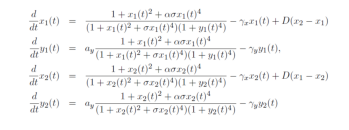

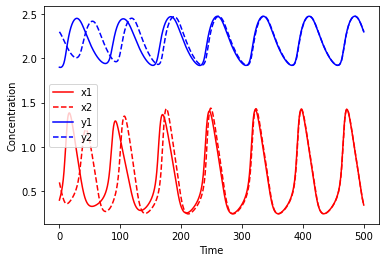

In [13]:

f = plt.figure()
plt.imshow(mpimg.imread("C:\\Users\\leder\\Downloads\\synchronization_ode.png"))
plt.axis("off")
plt.show()
plt.close()

f = plt.figure()
plt.plot(t, x1, "-r")
plt.plot(t, x2, "--r")
plt.plot(t, y1, "-b")
plt.plot(t, y2, "--b")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(["x1", "x2", "y1", "y2"])
plt.show()
plt.close()